In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# from iokectools.experiment_description import CycleDescription
from iokectools.cycle_description import CycleDescription
from iokectools.batchintegration import BatchIntegration

In [4]:
def timeshift_minimum(cycle, ed, maximum_timeshift=0.4):
    timeshifts = [maximum_timeshift-0.05*n for n in range(0,20,1)]

    fara_current = []
    sim_current = []

    for timeshift in timeshifts:
        overview = BatchIntegration(experiment_description=ed, interval=timeshift)
        fara_current.append(overview.charges[cycle].df[overview.charges[cycle].df["current1_muA_geo"] == overview.charges[cycle].df["current1_muA_geo"].max()]['time'].mean())
        sim_current.append(overview.charges[cycle].df[overview.charges[cycle].df["sim_current"] == overview.charges[cycle].df["sim_current"].max()]['time'].mean())

    data = {'interval':timeshifts, 't_max_j_F': fara_current, 't_max_j_sim':sim_current}
    import pandas as pd
    df = pd.DataFrame(data)
    df['t_diff'] = abs(df['t_max_j_F'] - df['t_max_j_sim'])
    return df

# Correlation between CV and MSCV
Often the DEMS signal is broader than the current in the CV (tailing effect). This phenomenon is caused by the broadening (smear-out) of the concentration profile of the products in the electrolyte on the way to the DEMS membrane.
To demonstrate that this is not the case in our measurements, we plot the measured current vs. the K-normalized MSCV current on a time axis for a measurement performed at 10 mV/s and 50 mV/s.

The K factor is chosen arbitrarily for better overlap of both curves. The effect should be larger at higher scan rates.

# Pt1 ML - 19.03.2019

We choose a COOR cycle recorded at 10 mV/s and 50 mV/s.

## For 10 mV/s

In [5]:
experiment_description_10 = { 
    'date' : ' 2019-03-19',
    'data folder' : r'..\data',
    'interval' : -0.4, # Add this value after experimenting with the BatchIntegrator
    'experiment name' : '20190319_DEMS_CV_STMV-100-ML_Ru0001_E_H2SO4_DEMS_COox004_pn_c_',
    'cycles': {
         97: {'K_prefactor': 1.05, 'K_power': 1E-6},
              }
}

ed_10 = CycleDescription(experiment_description_10)
overview_10 = BatchIntegration(	ed_10, cathodic_limit=0.2)#, interval=-0.40)

Text(0.5, 1.0, '10 mV/ s')

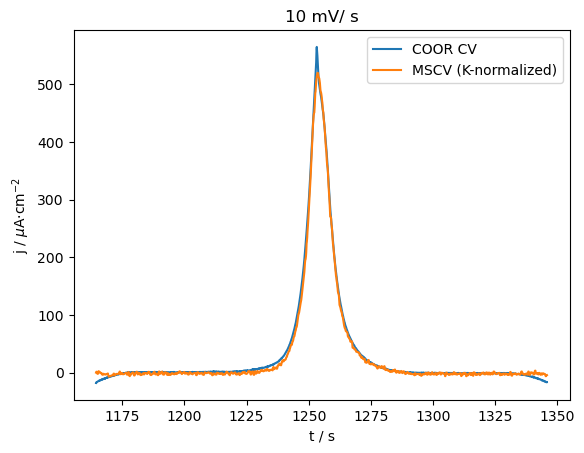

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
overview_10.charges[97].df.plot('time', 'current1_muA_geo', ax=ax, label='COOR CV')
overview_10.charges[97].df.plot('time', 'sim_current', ax=ax, label='MSCV (K-normalized)')
ax.set_ylabel(r'j / $\mu$A$\cdot$cm$^{-2}$')
ax.set_xlabel('t / s')
ax.set_title('10 mV/ s')

The interval was 0


<Axes: xlabel='interval'>

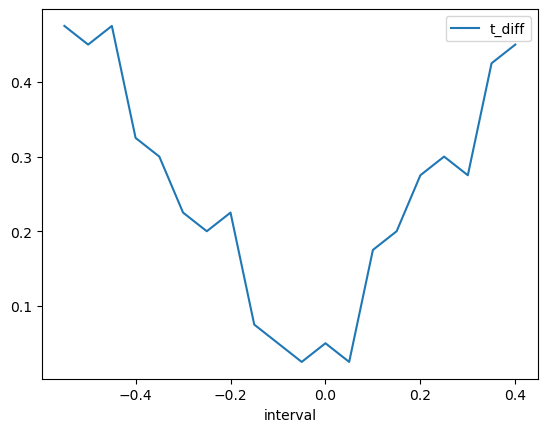

In [7]:
df_minimum = timeshift_minimum(cycle=97, ed=ed_10, maximum_timeshift=0.4)
df_minimum.plot('interval','t_diff')

The timeshift is in the range of 0.05 to -0.15 s.

## For 50 mV/s

In [8]:
cycle = 102

experiment_description_50 = { 
    'date' : ' 2019-03-19',
    'data folder' : r'..\data',
    'interval' : -0.4, # Add this value after experimenting with the BatchIntegrator
    'experiment name' : '20190319_DEMS_CV_STMV-100-ML_Ru0001_E_H2SO4_DEMS_COox004_pn_c_',
    'cycles': {
         cycle: {'K_prefactor': 0.95, 'K_power': 1E-6},
              }
}

ed_50 = CycleDescription(experiment_description_50)
overview_50 = BatchIntegration(ed_50, cathodic_limit=0.2)#, interval=-0.20)

Text(0.5, 1.0, '50 mV/ s')

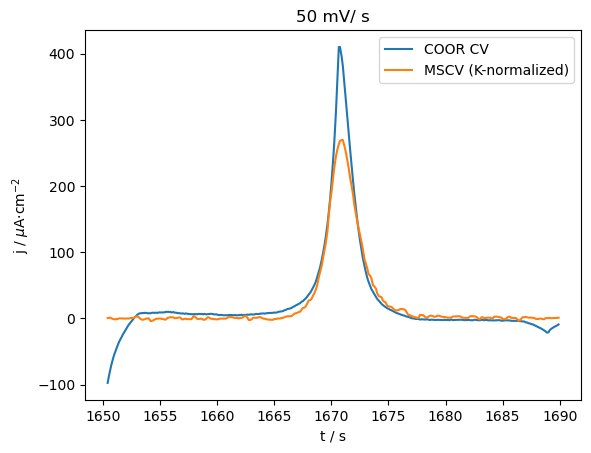

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
overview_50.charges[cycle].df.plot('time', 'current1_muA_geo', ax=ax, label='COOR CV')
overview_50.charges[cycle].df.plot('time', 'sim_current', ax=ax, label='MSCV (K-normalized)')
ax.set_ylabel(r'j / $\mu$A$\cdot$cm$^{-2}$')
ax.set_xlabel('t / s')
ax.set_title('50 mV/ s')


Overall our measuements do not indicate a tailing effect and hence the MSCV signal can be directly correlated with the current measured in the CV.

The interval was 0


<Axes: xlabel='interval'>

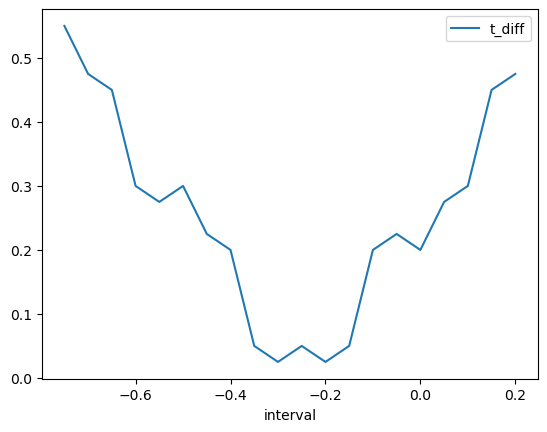

In [10]:
df_minimum = timeshift_minimum(cycle=cycle, ed=ed_50, maximum_timeshift=0.2)
df_minimum.plot('interval','t_diff')

The timeshift is in the range of -0.15 and -0.35 s, thus rather similar than in the scan recorded at 10 mV/s.

# Pt-3.5 ML - 28.03.2019

In [11]:
experiment_description_3 = { 
    'date' : ' 2019-03-28',
    'data folder' : r'..\data',
    'interval' : -0.5, # Add this value after experimenting with the BatchIntegrator
    'experiment name' : '20190328_DEMS_CV_STMV-330-ML_Ru0001_B_H2SO4_DEMS_COox001_pn_c_',
    'cycles': {
        #  91: {'K_prefactor': 1.15, 'K_power': 1E-7}, # TODO
        94: {'K_prefactor': 1.15, 'K_power': 1E-7},
        # 95: {'K_prefactor': 1.15, 'K_power': 1E-7}, 
        96: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # 97: {'K_prefactor': 1.15, 'K_power': 1E-7}, 
         # 98: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # 99: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # # 100: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # # 102: {'K_prefactor': 1.15, 'K_power': 1E-7}, # 10 mV / s
         # # 103: {'K_prefactor': 1.15, 'K_power': 1E-7}, # from here ok
         # # 104: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # # 105: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # # 106: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # 107: {'K_prefactor': 1.15, 'K_power': 1E-7}, # 1.15 # 1.50
         # 108: {'K_prefactor': 2.30, 'K_power': 1E-7}, # 2.30 # 2.70
         # 109: {'K_prefactor': 1.22, 'K_power': 1E-7}, # 1.22 # 1.45
         # 110: {'K_prefactor': 1.03, 'K_power': 1E-7}, # 1.03 # 1.20
         # 111: {'K_prefactor': 1.02, 'K_power': 1E-7}, # 1.02 # 1.20
         # 112: {'K_prefactor': 0.975, 'K_power': 1E-7}, # 0.975 # 1.15
         # 113: {'K_prefactor': 0.915, 'K_power': 1E-7}, # 0.95 # 1.12
         # 114: {'K_prefactor': 0.93, 'K_power': 1E-7}, # 0.93 # 1.10
         # 115: {'K_prefactor': 0.865, 'K_power': 1E-7},
         # 116: {'K_prefactor': 0.905, 'K_power': 1E-7},
         # 117: {'K_prefactor': 0.865, 'K_power': 1E-7},
         # 118: {'K_prefactor': 0.805, 'K_power': 1E-7},
         # 119: {'K_prefactor': 0.86, 'K_power': 1E-7},
         # # 120: {'K_prefactor': None, 'K_power': None} # Strong changes in flow conditions
              }
}

ed_3 = CycleDescription(experiment_description_3)
overview_3 = BatchIntegration(ed_3, cathodic_limit=0.2)#, interval=0.4)

Text(0.5, 1.0, '50 mV/ s')

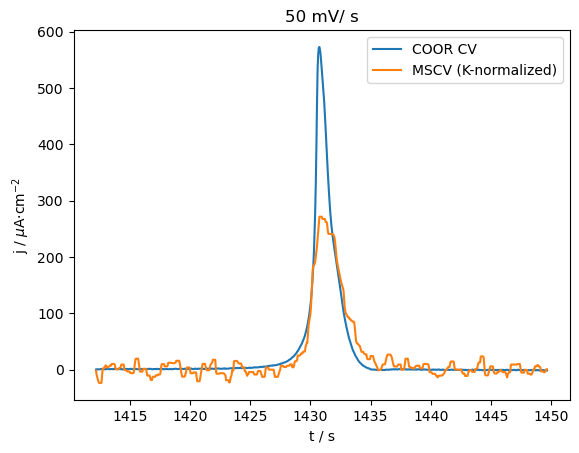

In [12]:
cycle = 96
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
overview_3.charges[cycle].df.plot('time', 'current1_muA_geo', ax=ax, label='COOR CV')
overview_3.charges[cycle].df.plot('time', 'sim_current', ax=ax, label='MSCV (K-normalized)')
ax.set_ylabel(r'j / $\mu$A$\cdot$cm$^{-2}$')
ax.set_xlabel('t / s')
ax.set_title('50 mV/ s')

The timeshift is in the range of -0.15 and -0.3 s.

The interval was 0


<Axes: xlabel='interval'>

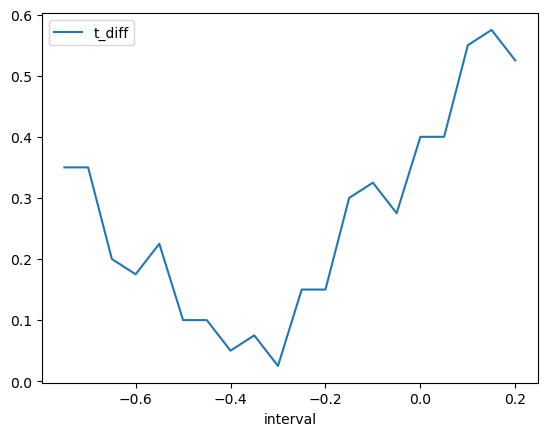

In [13]:
# For cycle 96
df_minimum = timeshift_minimum(cycle=96, ed=ed_3, maximum_timeshift=0.2)
df_minimum.plot('interval','t_diff')

The timeshift is between -0.3 and -0.45

The timeshift is smallest between -0.3 and -0.4.